# Assignment 4
## Part I 
## Mahla Entezari

## Import Libraries

In this task, in the first step, as always, I imported the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.express as px


from sklearn import *

from sklearn import set_config

import xgboost as xgb
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, roc_auc_score


from imblearn.over_sampling import RandomOverSampler
from scipy import stats


In [2]:
np.random.seed(1400)

## Read Data

Then I read the data from its path

In [3]:
data_path = "archive_data_part1/data.csv"
data = pd.read_csv(data_path)

## Visualizing Raw Data

First of all, I displayed and observed a round of data in general

In [4]:
data

Daily Time Spent on Site   Age  Area Income  Daily Internet Usage  \
0                        62.26  32.0     69481.85                172.83   
1                        41.73  31.0     61840.26                207.17   
2                        44.40  30.0     57877.15                172.83   
3                        59.88  28.0     56180.93                207.17   
4                        49.21  30.0     54324.73                201.58   
...                        ...   ...          ...                   ...   
9995                     41.73  31.0     61840.26                207.17   
9996                     41.73  28.0     51501.38                120.49   
9997                     55.60  39.0     38067.08                124.44   
9998                     46.61  50.0     43974.49                123.13   
9999                     46.61  43.0     60575.99                198.45   

                               Ad Topic Line             City  Gender  \
0            Decentralized real-time circuit         Lisafort    Male   
1             Optional full-range projection  West Angelabury    Male   
2        Total 5thgeneration standardization        Reyesfurt  Female   
3                Balanced empowering success      New Michael  Female   
4        Total 5thgeneration standardization     West Richard  Female   
...                                      ...              ...     ...   
9995          Profound executive flexibility  West Angelabury    Male   
9996          Managed zero tolerance concept      Kennedyfurt    Male   
9997          Intuitive exuding service-desk      North Randy  Female   
9998        Realigned content-based leverage   North Samantha  Female   
9999  Optimized upward-trending productivity     Port Jeffrey    Male   

                           Country            Timestamp  Clicked on Ad  
0     Svalbard & Jan Mayen Islands  2016-06-09 21:43:05              0  
1                        Singapore  2016-01-16 17:56:05              0  
2                       Guadeloupe  2016-06-29 10:50:45              0  
3                           Zambia  2016-06-21 14:32:32              0  
4                            Qatar  2016-07-21 10:54:35              1  
...                            ...                  ...            ...  
9995                     Singapore  2016-01-03 03:22:15              1  
9996                    Luxembourg  2016-05-28 12:20:15              0  
9997                         Egypt  2016-01-05 11:53:17              0  
9998                        Malawi  2016-04-04 07:07:46              1  
9999      Northern Mariana Islands  2016-04-03 21:13:46              1  

[10000 rows x 10 columns]

I defined a function that separates numerical columns and category columns and returns them.

<Axes: xlabel='Clicked on Ad'>

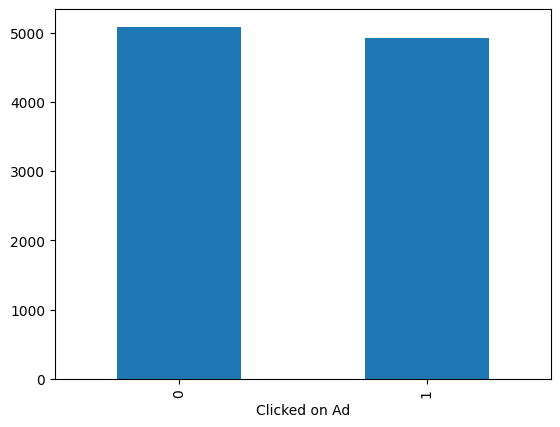

In [5]:
data['Clicked on Ad'].value_counts().plot(kind='bar')

 Plot the distribution of the target variable Clicked on Ad to check if the data is balanced. This can be done using a bar plot or pie chart.

array([[<Axes: title={'center': 'Daily Time Spent on Site'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Area Income'}>,
        <Axes: title={'center': 'Daily Internet Usage'}>]], dtype=object)

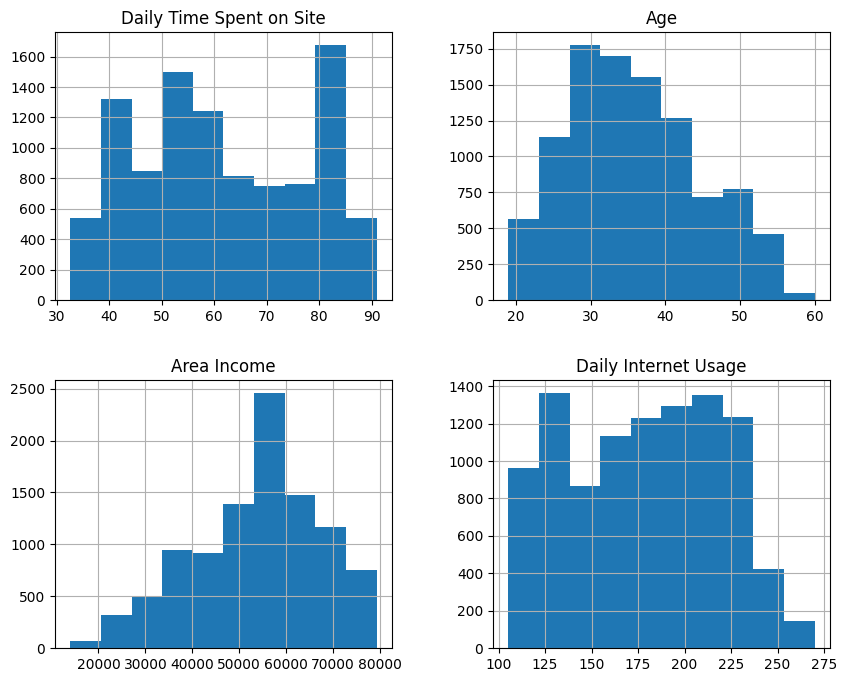

In [6]:
data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']].hist(figsize=(10,8))

Plot histograms for Daily Time Spent on Site, Age, Area Income, and Daily Internet Usage to check the distribution of these features.
Use box plots to identify potential outliers.

<Axes: xlabel='Gender'>

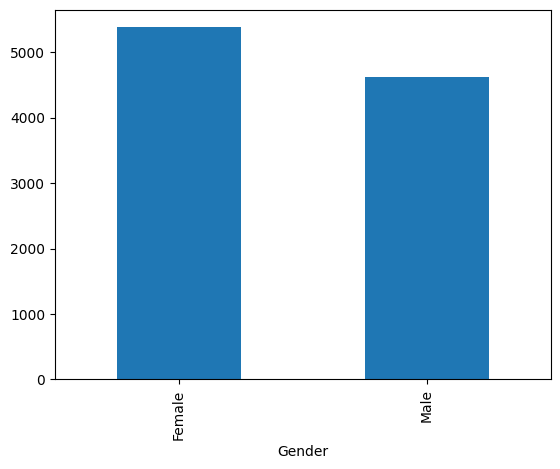

In [7]:
data['Gender'].value_counts().plot(kind='bar')

<Axes: xlabel='Clicked on Ad', ylabel='Age'>

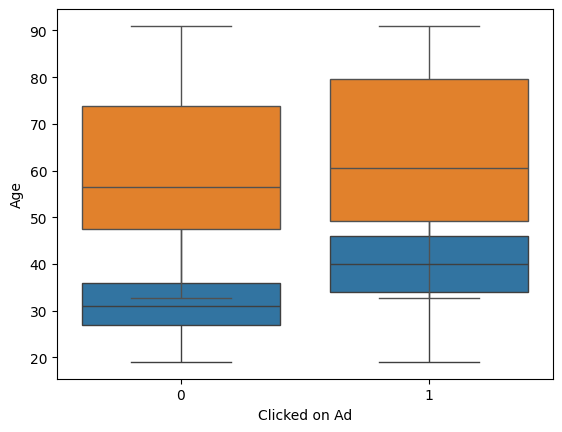

In [8]:
sns.boxplot(x='Clicked on Ad', y='Age', data=data)
sns.boxplot(x='Clicked on Ad', y='Daily Time Spent on Site', data=data)

Use box plots or violin plots to see how numerical features like Age, Daily Time Spent on Site, and Daily Internet Usage vary across the target (Clicked on Ad).

<Axes: xlabel='Clicked on Ad', ylabel='Age'>

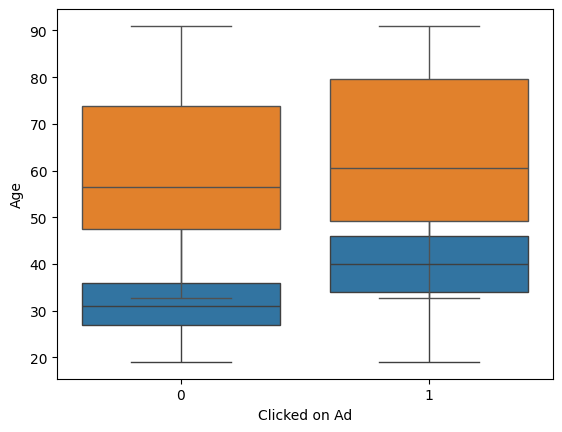

In [9]:
sns.boxplot(x='Clicked on Ad', y='Age', data=data)
sns.boxplot(x='Clicked on Ad', y='Daily Time Spent on Site', data=data)

<Axes: xlabel='Hour', ylabel='count'>

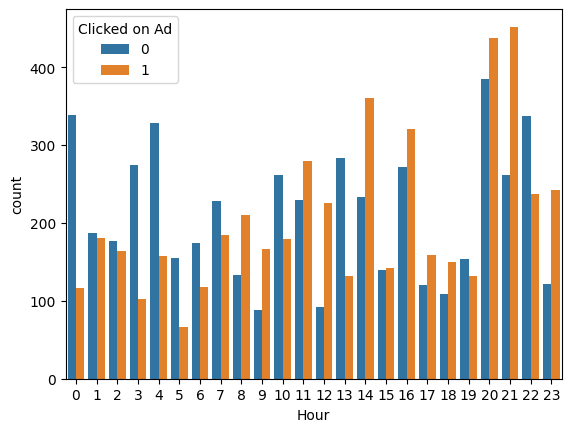

In [10]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Hour'] = data['Timestamp'].dt.hour
data['DayOfWeek'] = data['Timestamp'].dt.dayofweek
sns.countplot(x='Hour', hue='Clicked on Ad', data=data)

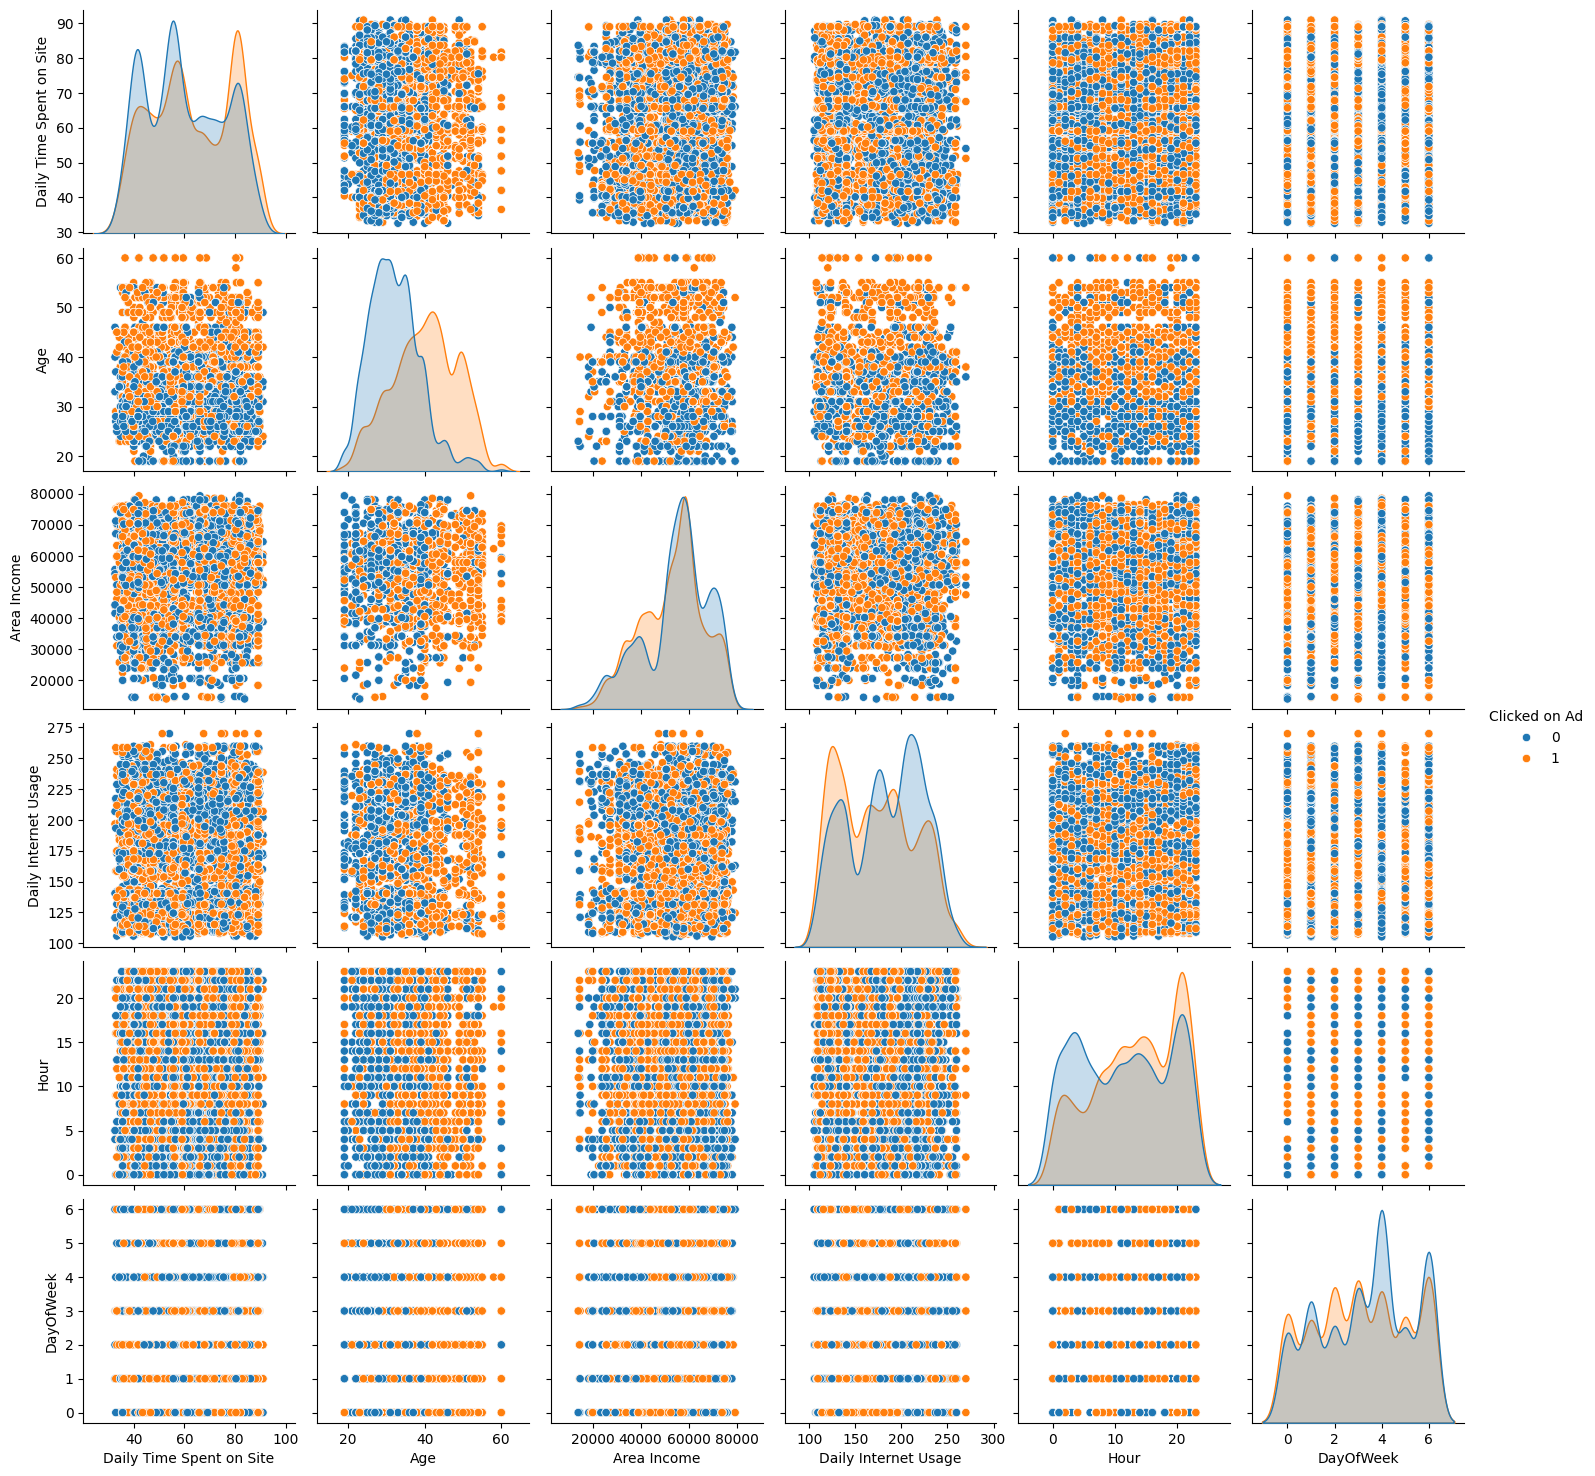

In [11]:
sns.pairplot(data, hue='Clicked on Ad')

<Axes: ylabel='Daily Time Spent on Site'>

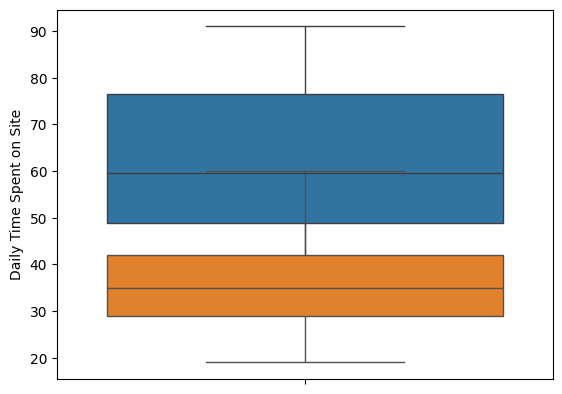

In [12]:
sns.boxplot(data['Daily Time Spent on Site'])
sns.boxplot(data['Age'])

In [13]:
def get_num_cat_features(dt):
    num_features = dt.select_dtypes(include=['int64', 'float64']).columns
    cat_features = dt.select_dtypes(include=['object']).columns

    print(num_features,'\n')
    print('\n',cat_features)

    return num_features, cat_features

## Split Data

Then I divide the data into training and testing so that I can train the model on the training data and evaluate it with the help of the test data.

In [14]:
data['Clicked on Ad'] = data['Clicked on Ad'].astype(bool)

train_data, test_data = train_test_split(data, test_size=0.1, random_state=42)
print(train_data.shape)
print(test_data.shape)

(9000, 12)
(1000, 12)


In [15]:
print(train_data.info())
print(train_data.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 9000 entries, 4896 to 7270
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  9000 non-null   float64       
 1   Age                       9000 non-null   float64       
 2   Area Income               9000 non-null   float64       
 3   Daily Internet Usage      9000 non-null   float64       
 4   Ad Topic Line             9000 non-null   object        
 5   City                      9000 non-null   object        
 6   Gender                    9000 non-null   object        
 7   Country                   9000 non-null   object        
 8   Timestamp                 9000 non-null   datetime64[ns]
 9   Clicked on Ad             9000 non-null   bool          
 10  Hour                      9000 non-null   int32         
 11  DayOfWeek                 9000 non-null   int32         
dtypes: bool(1), datetime64

In this step, I get their distribution for all the features.

Various results can be obtained from these charts and distributions, which I will mention here.\
One is that the age distribution is almost normal and its average is between 30 and 35, and as we move away from this range (both less and more), the number of data with that age also decreases.\
Or that Ad topic line and City are skewed to the right.\
Country and timestamp are as well.

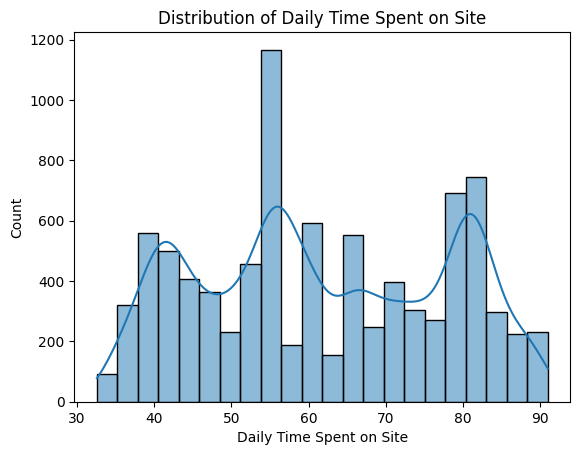

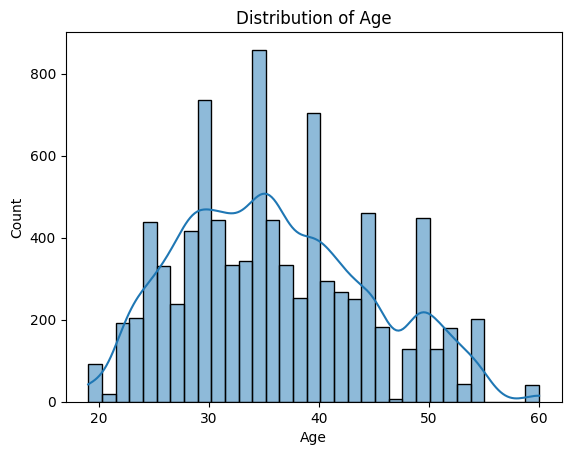

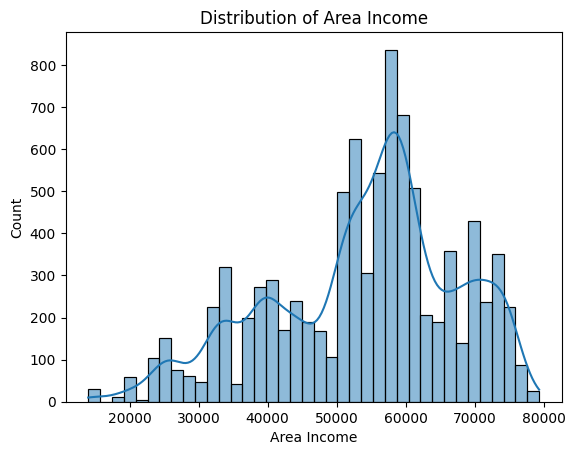

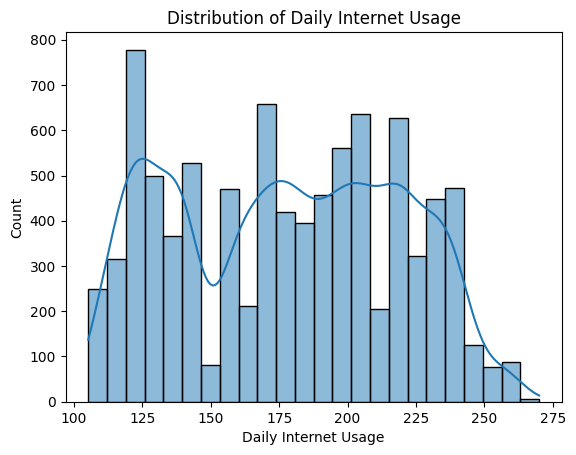

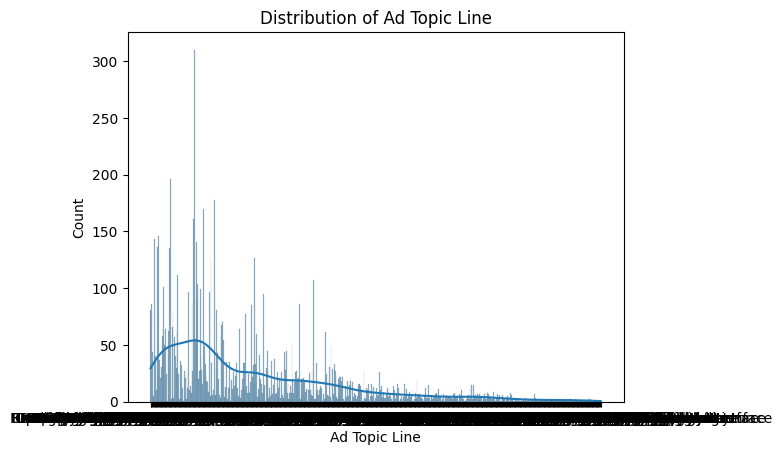

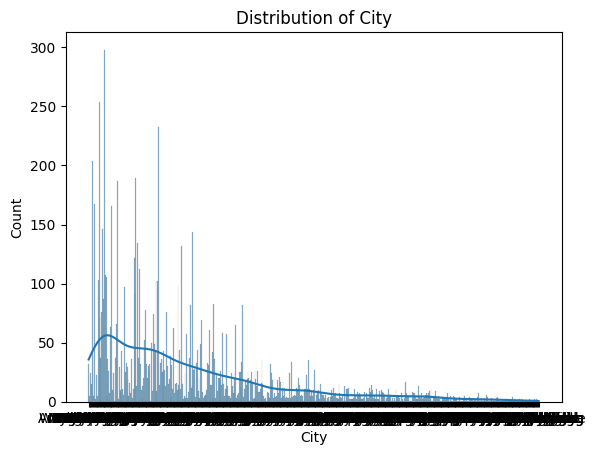

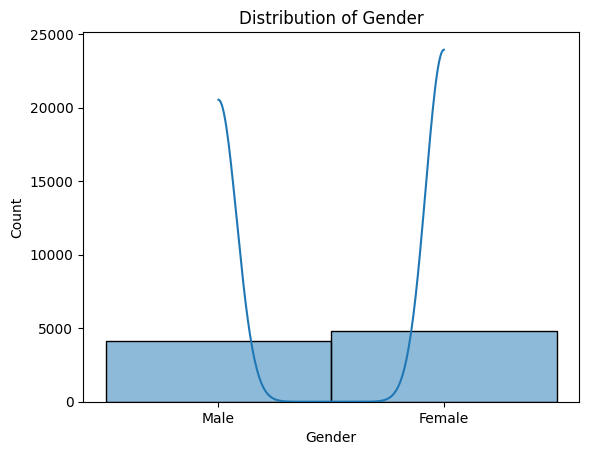

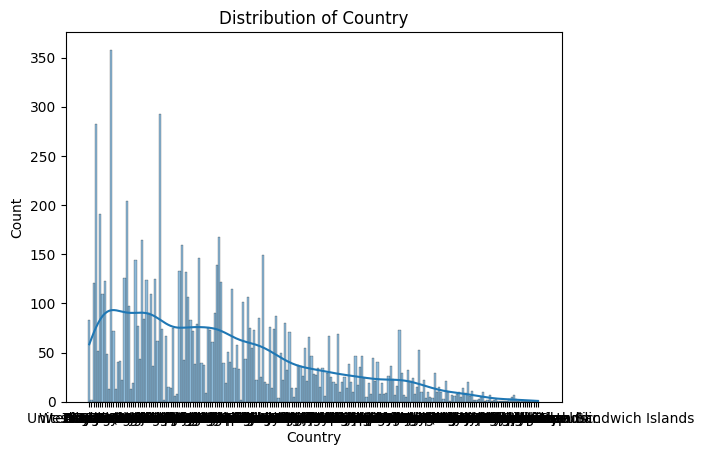

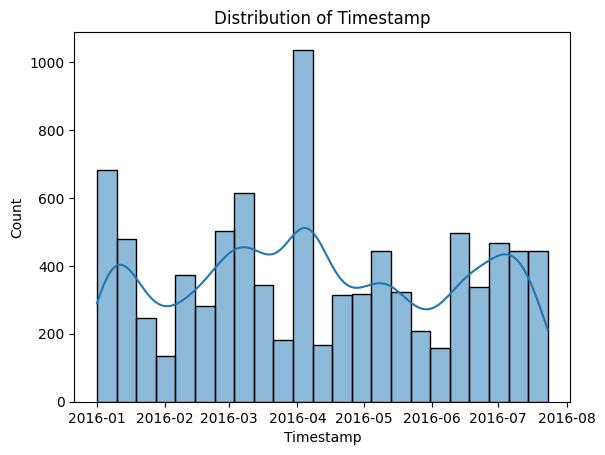

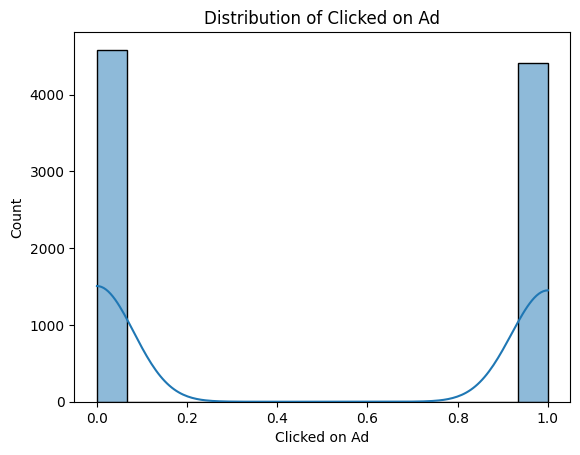

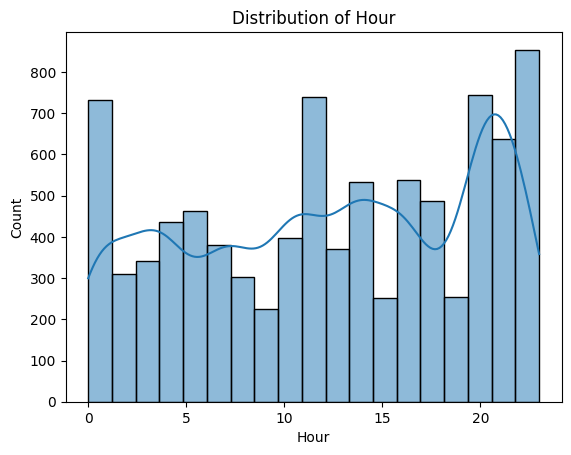

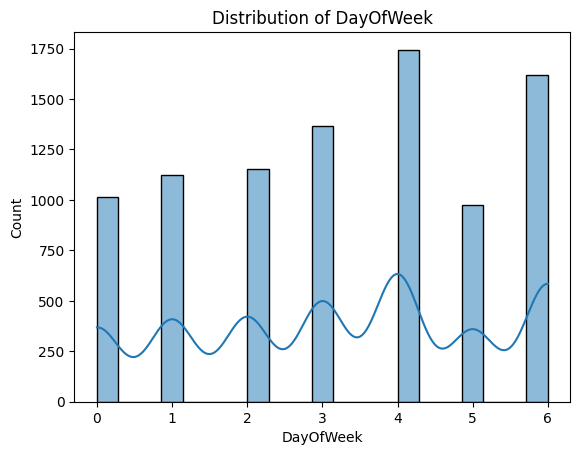

In [16]:
for col in train_data.columns:
    plt.figure()
    sns.histplot(train_data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

Here, I drew a two-variable bar graph that shows the daily use of the site at each age, to show it according to whether they click on the ad or not.\
From this graph, it can be concluded that at almost any age, the amount of daily usage of those who click is not much different from those who do not click.

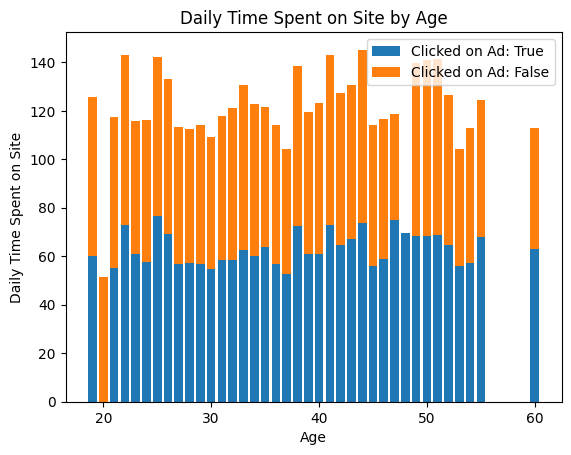

In [17]:
clicked_true = train_data[train_data['Clicked on Ad'] == True]
clicked_false = train_data[train_data['Clicked on Ad'] == False]

daily_time_true = clicked_true.groupby('Age')['Daily Time Spent on Site'].mean()
daily_time_false = clicked_false.groupby('Age')['Daily Time Spent on Site'].mean()

daily_time_true, daily_time_false = daily_time_true.align(daily_time_false, fill_value=0)

fig, ax = plt.subplots()

ax.bar(daily_time_true.index, daily_time_true, label='Clicked on Ad: True')
ax.bar(daily_time_false.index, daily_time_false, bottom=daily_time_true, label='Clicked on Ad: False')

ax.legend()
ax.set_title("Daily Time Spent on Site by Age")
ax.set_ylabel("Daily Time Spent on Site")
ax.set_xlabel("Age")

plt.show()

Here, I have written the outlier data drawing function, which is done below for each feature, so it does not show the output here.

In [18]:
def plot_outliers(column):
    fig = px.box(train_data, y=column)
    fig.update_traces(marker_color='#FF851B')
    fig.update_layout(autosize=False, width=600, height=500, title=f'Outliers in {column}')
    fig.show()

Here, I have drawn a function that shows the ratio of these two features according to the daily use of the Internet and the time spent on the site.\
The approximate and intuitive result that can be obtained from the output of this graph is that the bolder points are mostly at the top, which means that people with a younger age usually have more daily use of the Internet.\
Also, the density of people in the lower two parts is less than the middle and the upper part.

<Axes: xlabel='Daily Time Spent on Site', ylabel='Daily Internet Usage'>

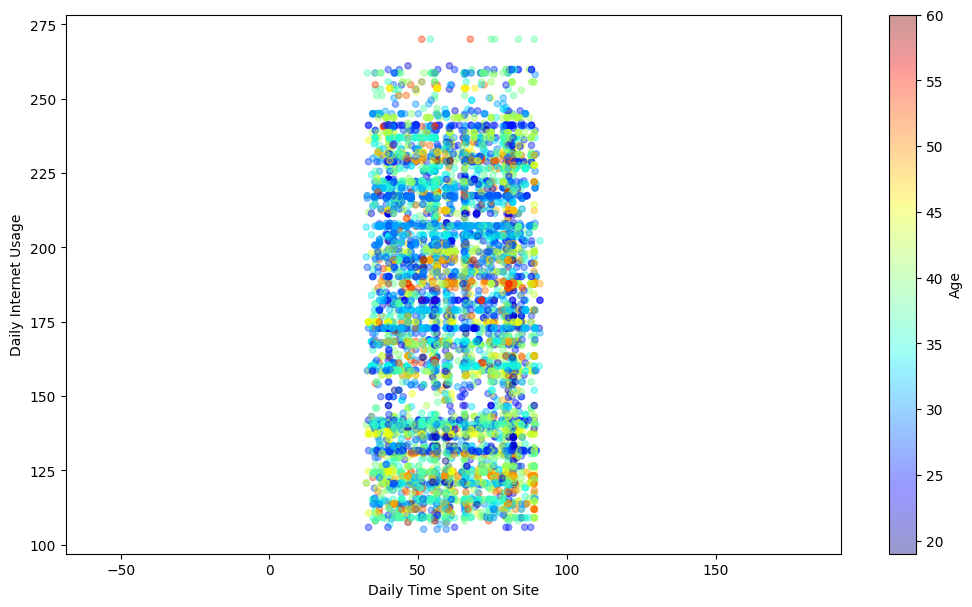

In [19]:
fig , ax = plt.subplots()
fig.set_size_inches(12.5, 7)

train_data.plot(x='Daily Time Spent on Site', y='Daily Internet Usage', ax=ax, kind='scatter', alpha=0.4, c='Age', cmap=plt.get_cmap('jet'), colorbar=True)
ax.axis('equal')

ax

This graph shows that we don't have many outlier data and only a few outlier data can be seen in the Area income feature

In [20]:
num_features, cat_features = get_num_cat_features(train_data)
for feature in num_features :
    plot_outliers(feature)

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage'],
      dtype='object') 


 Index(['Ad Topic Line', 'City', 'Gender', 'Country'], dtype='object')


## Data Cleaning and Feature Engineering

### Standardization

In this step, we scale the data to standardize.

In [21]:
def standard_scaling(dt, num_features):
    for feature in num_features:
        dt[feature] = (dt[feature] - dt[feature].mean())/dt[feature].std()
    return dt


### Inbalance Checking

In [22]:
train_data['Clicked on Ad'].value_counts()

Clicked on Ad
False    4586
True     4414
Name: count, dtype: int64

Here I checked whether the classes were unbalanced and they were not, but still I increased the number of data.

In [23]:
train_data['Clicked on Ad'].value_counts(normalize=True)

Clicked on Ad
False    0.509556
True     0.490444
Name: proportion, dtype: float64

## 

### Handling Missing Values

In [24]:
train_data.isna().sum()
test_data.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
Hour                        0
DayOfWeek                   0
dtype: int64

Here, I handle the missing data in such a way that if it is a number, I value it with the average of its column, and if it is a category, I value it with the most frequent category.

In [25]:
def fill_missed_vals(dt, num_features, cat_features):
    dt[num_features] = dt[num_features].fillna(dt[num_features].mean())
    dt[cat_features] = dt[cat_features].fillna(dt[cat_features].mode().iloc[0])
    return dt


### Target Encoding

In this step, I also convert the categorical data into a number using the label encoder.

In [26]:
from sklearn.model_selection import train_test_split
import category_encoders as ce

def target_encoding(train_data, test_data, cat_features):
    target_encoder = ce.TargetEncoder(cols=cat_features)
    X = train_data.drop('Clicked on Ad', axis=1)
    y_train = train_data['Clicked on Ad']
    X_train_encoded = target_encoder.fit_transform(X, y_train)
    
    X = test_data.drop('Clicked on Ad', axis=1)
    y_test = test_data['Clicked on Ad']
    X_test_encoded = target_encoder.transform(X)

    
    train_data = pd.concat([X_train_encoded, y_train], axis=1)    
    test_data = pd.concat([X_test_encoded, y_test], axis=1)    

    return train_data, test_data

### Handling Outliers

In [27]:
# def handle_outliers(dt, num_features):
#     for column in num_features:
#         plot_outliers(column)
#         Q1 = dt[column].quantile(0.25)
#         Q3 = dt[column].quantile(0.75)
#         IQR = Q3 - Q1
#         outlier_column_name = f'{column}_is_outlier'
#         dt[outlier_column_name] = dt[column].apply(lambda p: (p > Q3 + 1.5 * IQR) or (p < Q1 - 1.5 * IQR))
#     outlier_columns = [f'{column}_is_outlier' for column in dt.select_dtypes(include=['number']).columns]
    
#     dt = dt.drop(columns=outlier_columns)
    
#     return dt


In [28]:
def preprocess(train_data, test_data):
    num_features, cat_features = get_num_cat_features(train_data)
    train_data = standard_scaling(train_data, num_features)
    train_data, test_data = target_encoding(train_data, test_data, cat_features)
    # print("Before dropping outliers: ",train_data.shape)
    # train_data = handle_outliers(train_data, num_features)
    # print("After dropping outliers: ",train_data.shape)
    return train_data, test_data

In [29]:
train_data, test_data = preprocess(train_data, test_data)

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage'],
      dtype='object') 


 Index(['Ad Topic Line', 'City', 'Gender', 'Country'], dtype='object')


In [30]:
# train_data

In [31]:
# test_data

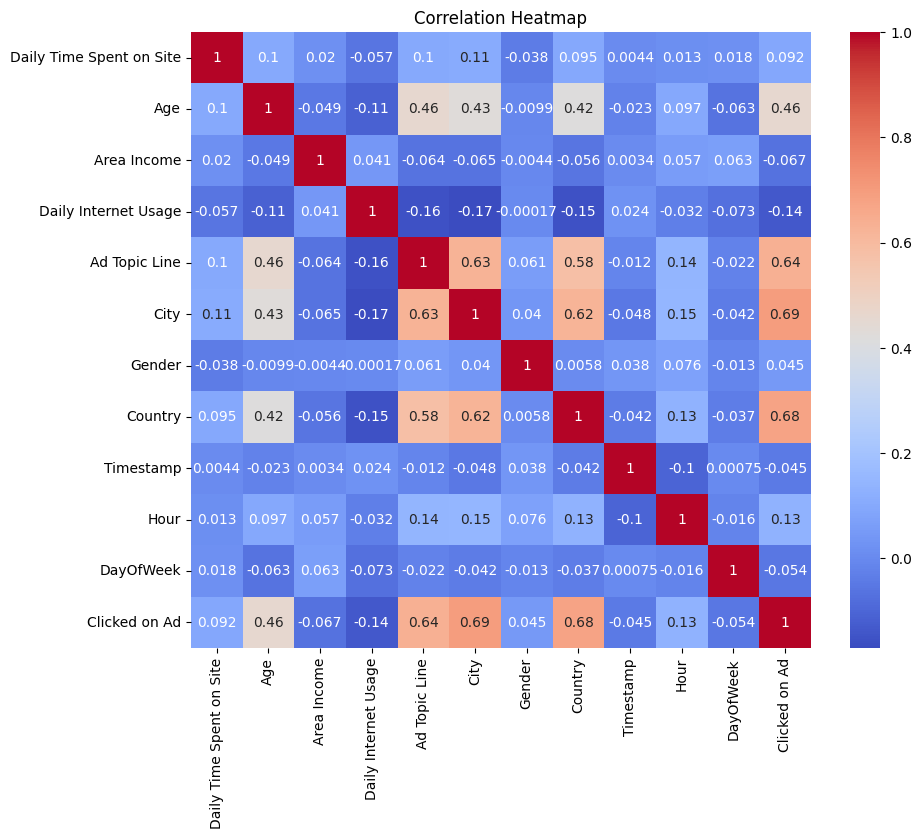

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

This graph shows the correlation between different features.

In [33]:
# train_data = train_data.drop('Age', axis=1)
# num_features, cat_features = get_num_cat_features(train_data)

In [34]:
X_train = train_data.drop('Clicked on Ad', axis=1)
Y_train = train_data['Clicked on Ad']

X_test = test_data.drop('Clicked on Ad', axis=1)
Y_test = test_data['Clicked on Ad']

print(X_train.shape)
print(Y_train.shape)

(9000, 11)
(9000,)


### Variance Threshold

Here, I set a variance threshold to select the features, but still no feature rejects it

In [35]:
X_train

Daily Time Spent on Site       Age  Area Income  Daily Internet Usage  \
4896                  0.390444  0.349212    -0.822023              0.538430   
4782                 -0.390345 -0.583540    -1.048976              1.539569   
1496                 -1.634509  0.232618     1.315437             -1.120985   
1957                  1.401327  0.582400     0.298970             -0.994526   
9171                 -1.634509  1.048776     0.483346             -0.958499   
...                        ...       ...          ...                   ...   
5734                  1.296797  0.582400     0.298970             -1.260434   
5191                  1.738501 -0.000570    -0.240178             -1.260434   
5390                  1.090924 -0.117164    -2.109276              1.447175   
860                  -0.141130 -0.700134     0.301246             -0.958499   
7270                 -0.170449 -0.350352    -0.082727             -1.585651   

      Ad Topic Line          City    Gender   Country           Timestamp  \
4896       0.296731  4.257389e-01  0.466314  0.650309 2016-07-09 11:18:02   
4782       0.058727  4.374600e-01  0.466314  0.491800 2016-06-21 14:32:32   
1496       0.957619  7.955091e-01  0.511148  0.958658 2016-01-15 19:40:47   
1957       0.534045  6.576530e-01  0.511148  0.911348 2016-05-31 23:42:26   
9171       0.546915  9.068627e-01  0.466314  0.240940 2016-03-05 12:03:41   
...             ...           ...       ...       ...                 ...   
5734       0.401884  9.867976e-01  0.511148  0.034314 2016-07-17 14:26:04   
5191       0.661928  8.691774e-01  0.466314  0.911348 2016-03-14 14:13:05   
5390       0.306765  2.025167e-07  0.511148  0.089255 2016-02-22 07:04:05   
860        0.530755  9.068627e-01  0.466314  0.356165 2016-03-18 13:00:12   
7270       0.223452  3.769187e-01  0.466314  0.268457 2016-03-24 06:36:52   

      Hour  DayOfWeek  
4896    11          5  
4782    14          1  
1496    19          4  
1957    23          1  
9171    12          5  
...    ...        ...  
5734    14          6  
5191    14          0  
5390     7          0  
860     13          4  
7270     6          3  

[9000 rows x 11 columns]

In [36]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

cols = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train_numeric = X_train[cols]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_numeric)

X_test_numeric = X_test[cols]
X_test = scaler.transform(X_test_numeric)

X_train = pd.DataFrame(X_train, columns=cols)
X_test = pd.DataFrame(X_test, columns=cols)
# X_train = pd.concat([pd.DataFrame(X_train_scaled, columns=numeric_cols), X_train[['Hour', 'DayOfWeek', 'Gender']]], axis=1)
# X_test = pd.concat([pd.DataFrame(X_test_scaled, columns=numeric_cols), X_test[['Hour', 'DayOfWeek', 'Gender']]], axis=1)



### Univariate Analysis

In [37]:
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.feature_selection import SelectKBest, chi2

# imputer = SimpleImputer(strategy='mean')

# numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
# X_train_imputed = X_train[numeric_cols]
# X_test_imputed = X_test[numeric_cols]

In [38]:
# X_train_imputed

In [39]:
# X_test_imputed

In [40]:
# X_train_imputed = imputer.fit_transform(X_train_imputed)
# X_test_imputed = imputer.transform(X_test_imputed)

# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train_imputed)
# X_test = scaler.transform(X_test_imputed)

# # selector = SelectKBest(chi2, k=8)
# # X_train = selector.fit_transform(X_train_scaled, Y_train)
# # X_test = selector.transform(X_test_scaled)

# # print('Number of features before selection:', X_train.shape[1])
# # print('Number of features after selection:', X_train.shape[1])


In [41]:
X_train

Daily Time Spent on Site       Age  Area Income  Daily Internet Usage  \
0                     0.390466  0.349231    -0.822069              0.538460   
1                    -0.390367 -0.583572    -1.049035              1.539654   
2                    -1.634600  0.232631     1.315510             -1.121048   
3                     1.401405  0.582432     0.298987             -0.994581   
4                    -1.634600  1.048834     0.483373             -0.958553   
...                        ...       ...          ...                   ...   
8995                  1.296869  0.582432     0.298987             -1.260504   
8996                  1.738598 -0.000570    -0.240191             -1.260504   
8997                  1.090984 -0.117170    -2.109393              1.447255   
8998                 -0.141138 -0.700173     0.301263             -0.958553   
8999                 -0.170459 -0.350371    -0.082732             -1.585739   

      Ad Topic Line      City    Gender   Country  
0         -0.689811 -0.239158 -1.079604  0.479555  
1         -1.552309 -0.201283 -1.079604 -0.009545  
2          1.705169  0.955701  0.926266  1.431008  
3          0.170187  0.510239  0.926266  1.285024  
4          0.216828  1.315524 -1.079604 -0.783607  
...             ...       ...       ...       ...  
8995      -0.308749  1.573822  0.926266 -1.421178  
8996       0.633619  1.193749 -1.079604  1.285024  
8997      -0.653448 -1.614870  0.926266 -1.251651  
8998       0.158265  1.315524 -1.079604 -0.428065  
8999      -0.955365 -0.396913 -1.079604 -0.698699  

[9000 rows x 8 columns]

### Feature Pairwise Correlation

Here, I set a correlation threshold to select the features, but still no feature rejects it

In [42]:
corr_matrix = X_train.corr().abs()

upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

THRESHOLD = 0.90
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > THRESHOLD)]
print('Feature(s) to drop:', ', '.join(to_drop))

selected = X_train.drop(to_drop, axis=1)

print('Number of features before selection:', X_train.shape[1])
print('Number of features after selection:', selected.shape[1])

Feature(s) to drop: 
Number of features before selection: 8
Number of features after selection: 8


#### If data was inbalance 

In [43]:
# ros = RandomOverSampler(sampling_strategy={True: 50000, False: 50000})
# X_train, Y_train = ros.fit_resample(X_train, Y_train)

# print(X_train.shape)
# print(Y_train.shape)

# Y_train.value_counts()


In [44]:
set_config(display='diagram')

### Using Pipline

In [45]:
transformer = FunctionTransformer(preprocess)

In [46]:
pipe = Pipeline(
    steps = [
            ('preprocess', transformer)
        ]
    )

pipe

Pipeline(steps=[('preprocess',
                 FunctionTransformer(func=<function preprocess at 0x000001EAB71598A0>))])

In [47]:
pipe.fit(train_data)

Pipeline(steps=[('preprocess',
                 FunctionTransformer(func=<function preprocess at 0x000001EAB71598A0>))])

## Setting Models

In [48]:
linreg_model = LinearRegression()
logreg_model = LogisticRegression(max_iter=1000)

param_grid = {'C': [1, 10, 100, 1000], 
              'gamma': [0.001, 0.0001],
              'kernel': ['rbf', 'linear']} 
grid_search = GridSearchCV(SVC(), param_grid, verbose=3, n_jobs=-1, cv=5)


param_grid = {'C': stats.uniform(2, 10), 
              'gamma': stats.uniform(0.1, 1),
              'kernel': ['rbf', 'linear']} 
rand_search = RandomizedSearchCV(SVC(), param_grid, verbose=3)

dTree_model = DecisionTreeClassifier(random_state=42)

randF_model = RandomForestClassifier(n_estimators=1000, random_state=42)

gboost_model = GradientBoostingClassifier(n_estimators=1000, random_state=42)

GBoost_reg_model = GradientBoostingRegressor(max_depth=32, n_estimators=10,)

ensemble_model = VotingClassifier(estimators=[('rf', randF_model), ('gb', gboost_model)], voting='hard')

nb_multi_model = MultinomialNB()

nb_bernouli_model = BernoulliNB()


## Split data using KFold

Here, using kfold, I divide the data into two parts, training and testing, and if it has higher accuracy, I choose that division as the optimal division.

In [49]:
# X_train

In [50]:
# kf = KFold(n_splits=5, shuffle=True, random_state=1)

# best_score = 0
# best_train_index = None
# best_test_index = None

# for train, test in kf.split(data):

#     train_data = data.iloc[train].copy()
#     test_data = data.iloc[test].copy()
    
#     # train_data = preprocess(train_data)
#     X_train = train_data.drop('Clicked on Ad', axis=1)
#     Y_train = train_data['Clicked on Ad']
    
#     # test_data = preprocess(test_data)
#     X_test = test_data.drop('Clicked on Ad', axis=1)
#     Y_test = test_data['Clicked on Ad']


#     # print('Train data', data.iloc[train], '| Test data', data.iloc[test])

#     logreg_model.fit(X_train, Y_train)
    
#     Y_pred = logreg_model.predict(X_test)
#     Y_pred = (Y_pred > 0.5).astype(int)
#     # print("Y_TEST : ",Y_test)
#     # print("Y_PRED : ",Y_pred)
#     score = accuracy_score(Y_test, Y_pred)
    
#     if score > best_score:
#         best_score = score
#         best_train_set = train
#         best_test_set = test


# print('best_score : ',best_score)
# print(best_train_set)
# print(best_test_set)    

In [51]:
# train_data = data.iloc[best_train_set].copy()
# test_data = data.iloc[best_test_set].copy()

# train_data = preprocess(train_data)
# test_data = preprocess(test_data)


# X_train = train_data.drop('Clicked on Ad', axis=1)
# Y_train = train_data['Clicked on Ad']

# X_test = test_data.drop('Clicked on Ad', axis=1)
# Y_test = test_data['Clicked on Ad']

# print(X_train.shape)
# print(Y_train.shape)

# print(X_test.shape)
# print(Y_test.shape)

In [52]:
# test_data = test_data.drop('Age', axis=1)
# num_features, cat_features = get_num_cat_features(test_data)

## Model Training

In [53]:
X_train

Daily Time Spent on Site       Age  Area Income  Daily Internet Usage  \
0                     0.390466  0.349231    -0.822069              0.538460   
1                    -0.390367 -0.583572    -1.049035              1.539654   
2                    -1.634600  0.232631     1.315510             -1.121048   
3                     1.401405  0.582432     0.298987             -0.994581   
4                    -1.634600  1.048834     0.483373             -0.958553   
...                        ...       ...          ...                   ...   
8995                  1.296869  0.582432     0.298987             -1.260504   
8996                  1.738598 -0.000570    -0.240191             -1.260504   
8997                  1.090984 -0.117170    -2.109393              1.447255   
8998                 -0.141138 -0.700173     0.301263             -0.958553   
8999                 -0.170459 -0.350371    -0.082732             -1.585739   

      Ad Topic Line      City    Gender   Country  
0         -0.689811 -0.239158 -1.079604  0.479555  
1         -1.552309 -0.201283 -1.079604 -0.009545  
2          1.705169  0.955701  0.926266  1.431008  
3          0.170187  0.510239  0.926266  1.285024  
4          0.216828  1.315524 -1.079604 -0.783607  
...             ...       ...       ...       ...  
8995      -0.308749  1.573822  0.926266 -1.421178  
8996       0.633619  1.193749 -1.079604  1.285024  
8997      -0.653448 -1.614870  0.926266 -1.251651  
8998       0.158265  1.315524 -1.079604 -0.428065  
8999      -0.955365 -0.396913 -1.079604 -0.698699  

[9000 rows x 8 columns]

In [54]:
linreg_model.fit(X_train, Y_train)

print(linreg_model.coef_)
print('\n', linreg_model.intercept_)

[-0.00122756  0.04746431 -0.00544478  0.00534166  0.09970433  0.16541578
  0.00919962  0.15917086]

 0.4904444444444445


In [55]:
logreg_model.fit(X_train, Y_train)

print(logreg_model.coef_)
print('\n', logreg_model.intercept_)

[[ 0.02583523  0.38272973 -0.07615909 -0.0217182   1.00346712  1.38548012
   0.05862269  1.17440844]]

 [0.03708244]


In [56]:
dTree_model.fit(X_train, Y_train)


randF_model.fit(X_train, Y_train)


gboost_model.fit(X_train, Y_train)

GBoost_reg_model.fit(X_train,Y_train)

ensemble_model.fit(X_train, Y_train)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
nb_multi_model.fit(X_train_scaled, Y_train)


nb_bernouli_model.fit(X_train, Y_train)


BernoulliNB()

### Hyperparameter Tuning

In [57]:
# grid_search.fit(X_train, Y_train)

# print(grid_search.best_params_)
# print(grid_search.best_estimator_)

In [58]:
# rand_search.fit(X_train, Y_train)

# print(rand_search.best_params_)
# print(rand_search.best_estimator_)

In [59]:
def logistic_function(x, a, b):
    return 1 / (1 + np.exp(-(a + b * x)))

This chart shows logistic regression.

[0.62021113 0.61962084 0.61903021 0.61843922 0.61784788 0.61725619
 0.61666415 0.61607176 0.61547904 0.61488597 0.61429255 0.6136988
 0.61310471 0.61251028 0.61191552 0.61132042 0.61072499 0.61012923
 0.60953315 0.60893673 0.60833999 0.60774292 0.60714554 0.60654783
 0.6059498  0.60535146 0.6047528  0.60415382 0.60355453 0.60295494
 0.60235503 0.60175481 0.60115429 0.60055346 0.59995233 0.5993509
 0.59874917 0.59814715 0.59754482 0.59694221 0.5963393  0.59573609
 0.5951326  0.59452882 0.59392476 0.59332041 0.59271578 0.59211086
 0.59150567 0.5909002 ]


Text(0, 0.5, 'Clicked on Ad')

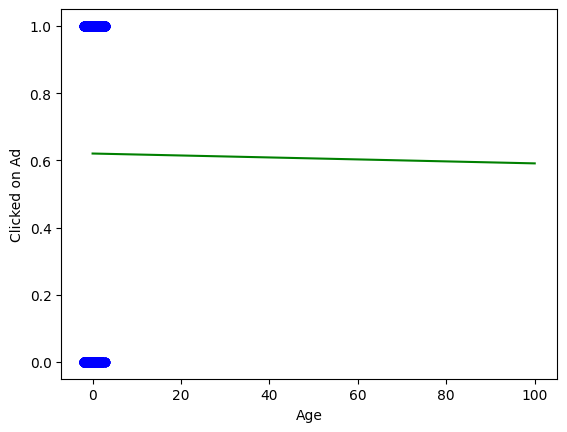

In [60]:
a = linreg_model.intercept_
b = linreg_model.coef_[0]

x = np.linspace(0, 100, 50)
# y = a + (x*b)

y_prob = logistic_function(x, a, b)
print(y_prob)
fig, ax = plt.subplots()
ax.scatter(train_data['Age'], train_data['Clicked on Ad'], c='blue')
ax.plot(x, y_prob , c='green')

ax.set_xlabel('Age')
ax.set_ylabel('Clicked on Ad')

And this graph shows the coefficient of features in logistic regression.

In [61]:
bar_chart = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': linreg_model.coef_})

fig = px.bar(bar_chart, x='Coefficient', y='Feature')

fig.update_layout(height=1200,
                  yaxis={'categoryorder':'total ascending'})
fig.show()

### Ridge Regression

This code trains Ridge regression models on X_train and Y_train with different alpha values (0.05 and 0.5), which control the regularization strength.

In [62]:
ridgeReg1 = Ridge(alpha=0.05)
ridgeReg2 = Ridge(alpha=0.5)
ridgeReg3 = Ridge(alpha=5)
ridgeReg4 = Ridge(alpha=10)

ridgeReg1.fit(X_train,Y_train)
ridgeReg2.fit(X_train,Y_train)
ridgeReg3.fit(X_train,Y_train)
ridgeReg4.fit(X_train,Y_train)

Ridge(alpha=10)

A pipeline is created for each alpha value, which includes scaling the features and fitting a Ridge regression model, then extracting the coefficients.\
The coefficients of the Ridge regression models for different alpha values are visualized using a horizontal bar chart with Plotly Express.

In [63]:
X = train_data[['Daily Time Spent on Site']]
y = train_data['Clicked on Ad']

alphas = [0.005, 0.5, 50]

coefficients = {}

for alpha in alphas:
    ridge_model = Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', Ridge(alpha=alpha))
    ])
    ridge_model.fit(X, y)
    coefficients[f'alpha={alpha}'] = ridge_model.named_steps['ridge'].coef_

coef_df = pd.DataFrame(coefficients, index=X.columns).reset_index()
coef_df = coef_df.melt(id_vars='index', var_name='Alpha', value_name='Coefficient')

fig = px.bar(coef_df, x='Coefficient', y='index', color='Alpha', barmode='group', orientation='h')

fig.update_layout(
    height=300,
    title='Ridge Regression Coefficients for Different Alpha Values',
    yaxis_title='Feature',
    xaxis_title='Coefficient',
    yaxis={'categoryorder':'total ascending'}
)

fig.show()

In [64]:
coef1 = ridgeReg1.coef_
coef2 = ridgeReg2.coef_
coef3 = ridgeReg3.coef_

alphas = ['alpha=0.05', 'alpha=0.5', 'alpha=5']
coefficients = [coef1[0], coef2[0], coef3[0]]

bar_chart = pd.DataFrame({
    'Alpha': ['alpha=0.05', 'alpha=0.5', 'alpha=5'],
    'Coefficient': [coef1, coef2, coef3]
})

fig = px.bar(bar_chart, x='Coefficient', y='Alpha', orientation='h')

fig.update_layout(
    height=300,
    title='Ridge Regression Coefficients for Different Alpha Values',
    yaxis={'categoryorder':'total ascending'}
)

fig.show()

A bar chart is created using Matplotlib to display the coefficients of Ridge regression models with three different alpha values.

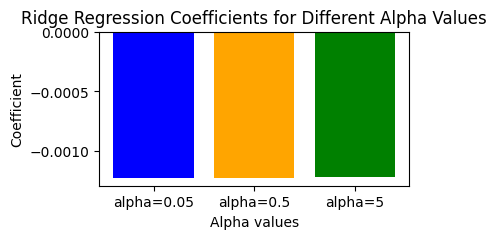

In [65]:
coef1 = ridgeReg1.coef_
coef2 = ridgeReg2.coef_
coef3 = ridgeReg3.coef_

alphas = ['alpha=0.05', 'alpha=0.5', 'alpha=5']
coefficients = [coef1[0], coef2[0], coef3[0]]

plt.figure(figsize=(4, 2))
plt.bar(alphas, coefficients, color=['blue', 'orange', 'green'])
plt.xlabel('Alpha values')
plt.ylabel('Coefficient')
plt.title('Ridge Regression Coefficients for Different Alpha Values')
plt.show()

In summary:

Extracts coefficients from trained Ridge regression models with different alpha values.\
Creates a DataFrame to organize the alpha values and their corresponding coefficients.\
Plots the coefficients for different alpha values using Plotly Express.\
Customizes the plot layout and displays it.

## Evaluation Metrics

Here I have defined different evaluation metrics

In [66]:
def scores(Y_test, Y_pred):
    
    accuracy = accuracy_score(Y_test, Y_pred)    
    print("Accuracy: %.3f" % accuracy)

    confusion = confusion_matrix(Y_test, Y_pred)
    print("confusion: \n" , confusion)

    precision = precision_score(Y_test, Y_pred)
    print("precision: %.3f" % precision)

    recall = recall_score(Y_test, Y_pred)
    print("recall: %.3f" % recall)

    f1 = f1_score(Y_test, Y_pred)
    print("f1_score: %.3f" % f1)

    report = classification_report(Y_test, Y_pred)
    print("report: " , report)

    return accuracy

## Evaluating Model

In [67]:
best_accuracy = 0
best_model = None

In this section, I will evaluate the models that I defined and taught above.

In [68]:
Y_pred = linreg_model.predict(X_test)

Y_pred = (Y_pred > 0.5).astype(int)

print('\n','linreg_model :')
acc = scores(Y_test, Y_pred)
if(acc > best_accuracy):
    best_accuracy = acc
    best_model = 'linreg_model'



 linreg_model :
Accuracy: 0.497
confusion: 
 [[497   0]
 [503   0]]
precision: 0.000
recall: 0.000
f1_score: 0.000
report:                precision    recall  f1-score   support

       False       0.50      1.00      0.66       497
        True       0.00      0.00      0.00       503

    accuracy                           0.50      1000
   macro avg       0.25      0.50      0.33      1000
weighted avg       0.25      0.50      0.33      1000



c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being s

In [69]:
Y_pred = logreg_model.predict(X_test)
print('\n','logreg_model :')
acc = scores(Y_test, Y_pred)
if(acc > best_accuracy):
    best_accuracy = acc
    best_model = 'logreg_model'



 logreg_model :
Accuracy: 0.497
confusion: 
 [[497   0]
 [503   0]]
precision: 0.000
recall: 0.000
f1_score: 0.000
report:                precision    recall  f1-score   support

       False       0.50      1.00      0.66       497
        True       0.00      0.00      0.00       503

    accuracy                           0.50      1000
   macro avg       0.25      0.50      0.33      1000
weighted avg       0.25      0.50      0.33      1000



c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being s

In [70]:
# Y_pred = grid_search.predict(X_test)

# print('\n','grid_search :')
# acc = scores(Y_test, Y_pred)
# if(acc > best_accuracy):
#     best_accuracy = acc
#     best_model = 'grid_search'


In [71]:
# Y_pred = rand_search.predict(X_test)

# print('\n','rand_search :')
# acc = scores(Y_test, Y_pred)
# if(acc > best_accuracy):
#     best_accuracy = acc
#     best_model = 'rand_search'


In [72]:
Y_pred = dTree_model.predict(X_test)
print('\n','dTree_model :')
acc = scores(Y_test, Y_pred)
if(acc > best_accuracy):
    best_accuracy = acc
    best_model = 'dTree_model'




Y_pred = randF_model.predict(X_test)
print('\n','randF_model :')
acc = scores(Y_test, Y_pred)
if(acc > best_accuracy):
    best_accuracy = acc
    best_model = 'randF_model'

print('ROC AUC Score:', roc_auc_score(Y_test, randF_model.predict_proba(X_test)[:, 1]))

cv_scores = cross_val_score(randF_model, X, y, cv=5, scoring='roc_auc')
print('Cross-Validation ROC AUC Scores:', cv_scores)
print('Mean ROC AUC Score:', np.mean(cv_scores))





Y_pred = gboost_model.predict(X_test)
print('\n','gboost_model :')
acc = scores(Y_test, Y_pred)
if(acc > best_accuracy):
    best_accuracy = acc
    best_model = 'gboost_model'


Y_pred = GBoost_reg_model.predict(X_test)
Y_pred_gboost_binary = (Y_pred > 0.5).astype(int)
print('\n','GBoost_reg_model :')
acc = scores(Y_test, Y_pred_gboost_binary)
if(acc > best_accuracy):
    best_accuracy = acc
    best_model = 'GBoost_reg_model'


Y_pred = ensemble_model.predict(X_test)
print('\n','ensemble_model :')
acc = scores(Y_test, Y_pred)
if(acc > best_accuracy):
    best_accuracy = acc
    best_model = 'ensemble_model'


scaler = MinMaxScaler()
X_test_scaled = scaler.fit_transform(X_test)
Y_pred = nb_multi_model.predict(X_test_scaled)
print('\n','nb_multi_model :')
acc = scores(Y_test, Y_pred)
if(acc > best_accuracy):
    best_accuracy = acc
    best_model = 'nb_multi_model'


Y_pred = nb_bernouli_model.predict(X_test)
print('\n','nb_bernouli_model :')
acc = scores(Y_test, Y_pred)
if(acc > best_accuracy):
    best_accuracy = acc
    best_model = 'nb_bernouli_model'



 dTree_model :
Accuracy: 0.768
confusion: 
 [[349 148]
 [ 84 419]]
precision: 0.739
recall: 0.833
f1_score: 0.783
report:                precision    recall  f1-score   support

       False       0.81      0.70      0.75       497
        True       0.74      0.83      0.78       503

    accuracy                           0.77      1000
   macro avg       0.77      0.77      0.77      1000
weighted avg       0.77      0.77      0.77      1000


 randF_model :
Accuracy: 0.845
confusion: 
 [[394 103]
 [ 52 451]]
precision: 0.814
recall: 0.897
f1_score: 0.853
report:                precision    recall  f1-score   support

       False       0.88      0.79      0.84       497
        True       0.81      0.90      0.85       503

    accuracy                           0.84      1000
   macro avg       0.85      0.84      0.84      1000
weighted avg       0.85      0.84      0.84      1000

ROC AUC Score: 0.9325715725766128
Cross-Validation ROC AUC Scores: [0.73506563 0.7139078  0.736550

In [73]:
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=2)
grid_search = GridSearchCV(xgb_model, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, Y_train)

print('\n','grid_search :')
acc = scores(Y_test, Y_pred)
if(acc > best_accuracy):
    best_accuracy = acc
    best_model = 'grid_search'



 grid_search :
Accuracy: 0.860
confusion: 
 [[427  70]
 [ 70 433]]
precision: 0.861
recall: 0.861
f1_score: 0.861
report:                precision    recall  f1-score   support

       False       0.86      0.86      0.86       497
        True       0.86      0.86      0.86       503

    accuracy                           0.86      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.86      0.86      0.86      1000



In [74]:
dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_test, label=Y_test)
params = {
    'max_depth': 3,
    'objective': 'multi:softmax',
    'num_class': 2, 
    'eval_metric': 'merror'  
}

num_rounds = 100
xgb_model = xgb.train(params, dtrain, num_boost_round=num_rounds)
Y_pred = xgb_model.predict(dtest)

print('\n','xgb_model :')
acc = scores(Y_test, Y_pred)
if(acc > best_accuracy):
    best_accuracy = acc
    best_model = 'xgb_model'



 xgb_model :
Accuracy: 0.864
confusion: 
 [[409  88]
 [ 48 455]]
precision: 0.838
recall: 0.905
f1_score: 0.870
report:                precision    recall  f1-score   support

       False       0.89      0.82      0.86       497
        True       0.84      0.90      0.87       503

    accuracy                           0.86      1000
   macro avg       0.87      0.86      0.86      1000
weighted avg       0.87      0.86      0.86      1000



In [75]:
print("The best model is --",best_model,"-- with Accuracy ", best_accuracy)

The best model is -- xgb_model -- with Accuracy  0.864


In [76]:
X_train

Daily Time Spent on Site       Age  Area Income  Daily Internet Usage  \
0                     0.390466  0.349231    -0.822069              0.538460   
1                    -0.390367 -0.583572    -1.049035              1.539654   
2                    -1.634600  0.232631     1.315510             -1.121048   
3                     1.401405  0.582432     0.298987             -0.994581   
4                    -1.634600  1.048834     0.483373             -0.958553   
...                        ...       ...          ...                   ...   
8995                  1.296869  0.582432     0.298987             -1.260504   
8996                  1.738598 -0.000570    -0.240191             -1.260504   
8997                  1.090984 -0.117170    -2.109393              1.447255   
8998                 -0.141138 -0.700173     0.301263             -0.958553   
8999                 -0.170459 -0.350371    -0.082732             -1.585739   

      Ad Topic Line      City    Gender   Country  
0         -0.689811 -0.239158 -1.079604  0.479555  
1         -1.552309 -0.201283 -1.079604 -0.009545  
2          1.705169  0.955701  0.926266  1.431008  
3          0.170187  0.510239  0.926266  1.285024  
4          0.216828  1.315524 -1.079604 -0.783607  
...             ...       ...       ...       ...  
8995      -0.308749  1.573822  0.926266 -1.421178  
8996       0.633619  1.193749 -1.079604  1.285024  
8997      -0.653448 -1.614870  0.926266 -1.251651  
8998       0.158265  1.315524 -1.079604 -0.428065  
8999      -0.955365 -0.396913 -1.079604 -0.698699  

[9000 rows x 8 columns]

In [77]:
X_test

Daily Time Spent on Site        Age   Area Income  Daily Internet Usage  \
0                   55.603089  39.002167  42995.868726            115.266404   
1                   80.914495  41.002278  59246.751578            112.526252   
2                   61.843436  45.002500  70057.162173            174.889716   
3                   59.223290  28.001556  53061.857963            140.467804   
4                   86.064782  32.001778  55427.319381            178.929941   
..                        ...        ...           ...                   ...   
995                 43.632424  32.001778  69485.710424            226.552587   
996                 70.393911  27.001500  36886.279295            131.297294   
997                 85.564754  45.002500  67578.874486            174.889716   
998                 59.053281  52.002889  73053.358633            148.618257   
999                 66.083671  52.002889  33953.516359            117.756542   

     Ad Topic Line      City    Gender   Country  
0        -1.175394  0.058500 -1.079604 -1.059524  
1        -1.631699 -1.548292  0.926266 -1.421178  
2         1.783231  1.315524  0.926266  1.447569  
3        -0.695278 -0.022924  0.926266 -1.159692  
4        -1.113644 -1.531660 -1.079604 -0.428065  
..             ...       ...       ...       ...  
995       0.525200  1.341441 -1.079604  1.265353  
996      -1.760272 -0.488158 -1.079604 -1.251651  
997       1.783231  1.315524  0.926266  1.236230  
998      -0.294365  0.833332 -1.079604  0.810739  
999       0.210169  1.503152 -1.079604  0.061561  

[1000 rows x 8 columns]

In [78]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features)
    ]
)

In [79]:
model = Pipeline(steps=[
    # ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

rf_params = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
}

grid_search = GridSearchCV(model, rf_params, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, Y_train)

Y_pred = grid_search.best_estimator_.predict(X_test)


print('\n','RandomForestClassifier :')
scores(Y_test, Y_pred)





 RandomForestClassifier :
Accuracy: 0.854
confusion: 
 [[404  93]
 [ 53 450]]
precision: 0.829
recall: 0.895
f1_score: 0.860
report:                precision    recall  f1-score   support

       False       0.88      0.81      0.85       497
        True       0.83      0.89      0.86       503

    accuracy                           0.85      1000
   macro avg       0.86      0.85      0.85      1000
weighted avg       0.86      0.85      0.85      1000



0.854

The best model I found was Random Forest with an accuracy of about 86%